In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
dataUji = pd.read_excel('datauji.xlsx')
dataUji.head(9)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,No,Jenis Produk,Ukuran,Biaya Produksi,Harga Jual Per Item,Laba Per Item,Permintaan Terendah\n(Dihitung Perbungkus),Permintaan Tertinggi\n(Dihitung Perbungkus)
1,0.0,"1,0",Produk A,5 liter,47000,60000,13000,200,350
2,1.0,NaN,NaN,"1,5 liter",14400,25000,10600,100,150
3,2.0,NaN,NaN,600 ml,5760,10000,4240,50,100
4,3.0,"2,0",Produk B,5 liter,6350,75000,68650,200,500
5,4.0,NaN,NaN,"1,5 liter",19050,30000,10950,50,100
6,5.0,NaN,NaN,600 ml,7620,15000,7380,50,100
7,6.0,"3,0",Produk B,5 liter,100000,150000,50000,200,500
8,7.0,NaN,NaN,"1,5 liter",40050,55000,14950,50,100


In [3]:
def populationClass(populasi, jumlahPopulasi, count, minimalOrder, maksimalOrder):
    for _ in range(jumlahPopulasi):
        individu = [random.randint(minimalOrder, maksimalOrder) for _ in range(9)]
        populasi.append(individu)

populasi = []
jumlahPopulasi = 100

dataOL = pd.DataFrame({
    'biayaProduksi': [100, 200, 300],
    'minimalOrder': [10, 20, 30],
    'maksimalOrder': [50, 60, 70]
})

count = dataOL.biayaProduksi.count()

minimalOrder = dataOL.minimalOrder[0]
maksimalOrder = dataOL.maksimalOrder[0]

populationClass(populasi, jumlahPopulasi, count, minimalOrder, maksimalOrder)

populasiAwal = pd.DataFrame(populasi, columns=["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"])
print(populasiAwal.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9
0  46  20  46  26  28  12  11  15  43
1  29  12  25  36  45  13  33  50  33
2  28  24  24  40  15  32  41  31  31
3  33  24  19  46  36  44  47  43  45
4  11  19  40  39  44  42  34  42  14


In [4]:
def fitnessClass(populasi, jumlahPopulasi, fitness, c1, c2):
    for i in range(jumlahPopulasi):
        fit = sum(populasi[i])
        fitness.append(fit)
        c1.append(fit * 2)
        c2.append(fit * 3)

fitness = []
c1 = []
c2 = []
totalLaba = []
fitnessClass(populasi, len(populasi), fitness, c1, c2)
totalLaba = fitness

In [5]:
populasiAwal["totalLaba"] = totalLaba
populasiAwal["c1"] = c1
populasiAwal["c2"] = c2
populasiAwal["fitness"] = fitness

print(populasiAwal.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9  totalLaba   c1    c2  fitness
0  46  20  46  26  28  12  11  15  43        247  494   741      247
1  29  12  25  36  45  13  33  50  33        276  552   828      276
2  28  24  24  40  15  32  41  31  31        266  532   798      266
3  33  24  19  46  36  44  47  43  45        337  674  1011      337
4  11  19  40  39  44  42  34  42  14        285  570   855      285


In [6]:
def crossoverClass(childs, populasi, count, Cr):
    for i in range(0, len(populasi), 2):
        if i+1 < len(populasi):
            parent1 = populasi[i]
            parent2 = populasi[i+1]
            child1 = parent1[:]
            child2 = parent2[:]
            if random.random() < Cr:
                crossover_point = random.randint(1, count-1)
                child1[crossover_point:], child2[crossover_point:] = parent2[crossover_point:], parent1[crossover_point:]
            childs.append(child1)
            childs.append(child2)
        else:
            childs.append(populasi[i])

childs = []
Cr = 0.5
crossoverClass(childs, populasi, dataOL.biayaProduksi.count(), Cr)

In [7]:
populasiCrossover = pd.DataFrame(childs, columns=["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"])
print(populasiCrossover.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9
0  46  20  46  26  28  12  11  15  43
1  29  12  25  36  45  13  33  50  33
2  28  24  19  46  36  44  47  43  45
3  33  24  24  40  15  32  41  31  31
4  11  19  40  39  44  42  34  42  14


In [8]:
fitness = []
c1 = []
c2 = []
totalLaba = []
fitnessClass(childs, len(childs), fitness, c1, c2)

populasiCrossover["totalLaba"] = fitness
populasiCrossover["c1"] = c1
populasiCrossover["c2"] = c2
populasiCrossover["fitness"] = fitness

print(populasiCrossover.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9  totalLaba   c1   c2  fitness
0  46  20  46  26  28  12  11  15  43        247  494  741      247
1  29  12  25  36  45  13  33  50  33        276  552  828      276
2  28  24  19  46  36  44  47  43  45        332  664  996      332
3  33  24  24  40  15  32  41  31  31        271  542  813      271
4  11  19  40  39  44  42  34  42  14        285  570  855      285


In [9]:
def mutationClass(parents, populasi, MR, minimalOrder, maksimalOrder):
    for individu in populasi:
        mutated = individu[:]
        if random.random() < MR:
            mutation_point = random.randint(0, len(individu)-1)
            mutated[mutation_point] = random.randint(minimalOrder, maksimalOrder)
        parents.append(mutated)

parents = []
MR = 0.5
mutationClass(parents, populasi, MR, minimalOrder, maksimalOrder)

In [10]:
populasiMutasi = pd.DataFrame(parents, columns=["a1", "a2", "a3", "a4", "a5", "a6", "a7", "a8", "a9"])
print(populasiMutasi.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9
0  46  20  46  23  28  12  11  15  43
1  29  35  25  36  45  13  33  50  33
2  28  24  24  27  15  32  41  31  31
3  33  24  19  46  36  44  47  43  45
4  11  19  40  39  44  42  34  42  14


In [11]:
fitness = []
c1 = []
c2 = []
totalLaba = []
fitnessClass(parents, len(parents), fitness, c1, c2)

populasiMutasi["totalLaba"] = fitness
populasiMutasi["c1"] = c1
populasiMutasi["c2"] = c2
populasiMutasi["fitness"] = fitness
print(populasiMutasi.head())

   a1  a2  a3  a4  a5  a6  a7  a8  a9  totalLaba   c1    c2  fitness
0  46  20  46  23  28  12  11  15  43        244  488   732      244
1  29  35  25  36  45  13  33  50  33        299  598   897      299
2  28  24  24  27  15  32  41  31  31        253  506   759      253
3  33  24  19  46  36  44  47  43  45        337  674  1011      337
4  11  19  40  39  44  42  34  42  14        285  570   855      285


In [12]:
populasiGabungan = pd.concat([populasiAwal, populasiCrossover, populasiMutasi]).reset_index(drop=True)
populasiGabungan = populasiGabungan.sort_values('fitness', ascending=False)
print(populasiGabungan)

     a1  a2  a3  a4  a5  a6  a7  a8  a9  totalLaba   c1    c2  fitness
23   42  49  49  49  33  36  22  48  44        372  744  1116      372
123  42  49  49  49  33  36  22  48  44        372  744  1116      372
223  42  49  49  49  29  36  22  48  44        368  736  1104      368
166  47  37  36  35  37  39  49  34  43        357  714  1071      357
274  38  45  28  28  39  45  42  42  45        352  704  1056      352
..   ..  ..  ..  ..  ..  ..  ..  ..  ..        ...  ...   ...      ...
63   44  11  21  14  18  10  28  21  29        196  392   588      196
263  44  11  21  14  18  10  28  21  29        196  392   588      196
229  15  13  15  34  15  34  29  20  16        191  382   573      191
162  38  11  21  14  18  10  28  21  29        190  380   570      190
6    18  14  32  26  18  12  13  25  19        177  354   531      177

[300 rows x 13 columns]


In [13]:
populasiTerbaik = populasiGabungan.head(5)
print(populasiTerbaik)

     a1  a2  a3  a4  a5  a6  a7  a8  a9  totalLaba   c1    c2  fitness
23   42  49  49  49  33  36  22  48  44        372  744  1116      372
123  42  49  49  49  33  36  22  48  44        372  744  1116      372
223  42  49  49  49  29  36  22  48  44        368  736  1104      368
166  47  37  36  35  37  39  49  34  43        357  714  1071      357
274  38  45  28  28  39  45  42  42  45        352  704  1056      352


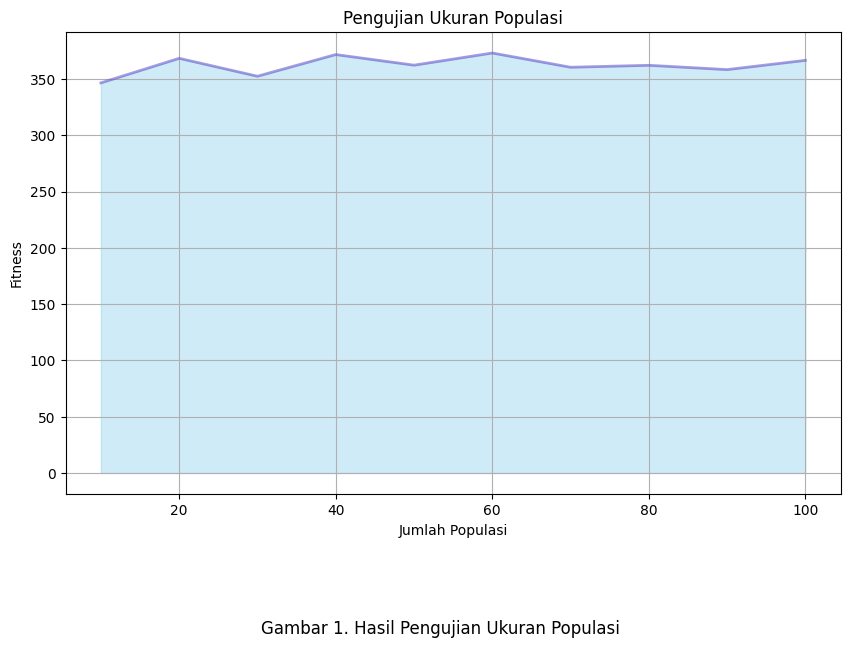

In [14]:
def populationClass(jumlahPopulasi, minimalOrder, maksimalOrder):
    populasi = []
    for _ in range(jumlahPopulasi):
        individu = [random.randint(minimalOrder, maksimalOrder) for _ in range(9)]
        populasi.append(individu)
    return populasi

def fitnessClass(populasi):
    fitness = []
    for individu in populasi:
        fit = sum(individu)
        fitness.append(fit)
    return fitness

minimalOrder = 10
maksimalOrder = 70

ukuran_populasi = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fitness_rata2 = []

for jumlahPopulasi in ukuran_populasi:
    populasi = populationClass(jumlahPopulasi, minimalOrder, maksimalOrder)
    fitness = fitnessClass(populasi)
    fitness_rata2.append(sum(fitness) / len(fitness))

plt.figure(figsize=(10, 6))
plt.fill_between(ukuran_populasi, fitness_rata2, color="skyblue", alpha=0.4)
plt.plot(ukuran_populasi, fitness_rata2, color="Slateblue", alpha=0.6, linewidth=2)

plt.title('Pengujian Ukuran Populasi')
plt.xlabel('Jumlah Populasi')
plt.ylabel('Fitness')

plt.figtext(0.5, -0.1, 'Gambar 1. Hasil Pengujian Ukuran Populasi', ha='center', va='top', fontsize=12)

plt.grid(True)
plt.show()

     iterasi 1  iterasi 2  iterasi 3  iterasi 4  iterasi 5  iterasi 6  \
0       359.28     357.12     343.84     356.26     364.62     346.44   
1       360.02     366.16     345.30     367.36     354.00     377.70   
2       358.44     374.06     356.38     360.36     362.02     362.50   
3       365.80     359.06     358.02     358.56     342.48     359.14   
4       346.68     357.32     359.24     347.66     347.10     353.12   
..         ...        ...        ...        ...        ...        ...   
116     362.62     354.78     363.38     353.14     355.34     350.76   
117     362.62     373.74     339.14     358.44     359.98     370.46   
118     356.00     364.08     356.98     358.94     348.44     363.48   
119     355.44     371.88     348.82     353.20     372.50     372.68   
120     369.72     372.46     371.80     356.90     352.86     351.82   

     iterasi 7  iterasi 8  iterasi 9  iterasi 10  Rata-rata Fitness   MR   CR  
0       374.14     359.14     345.30      3

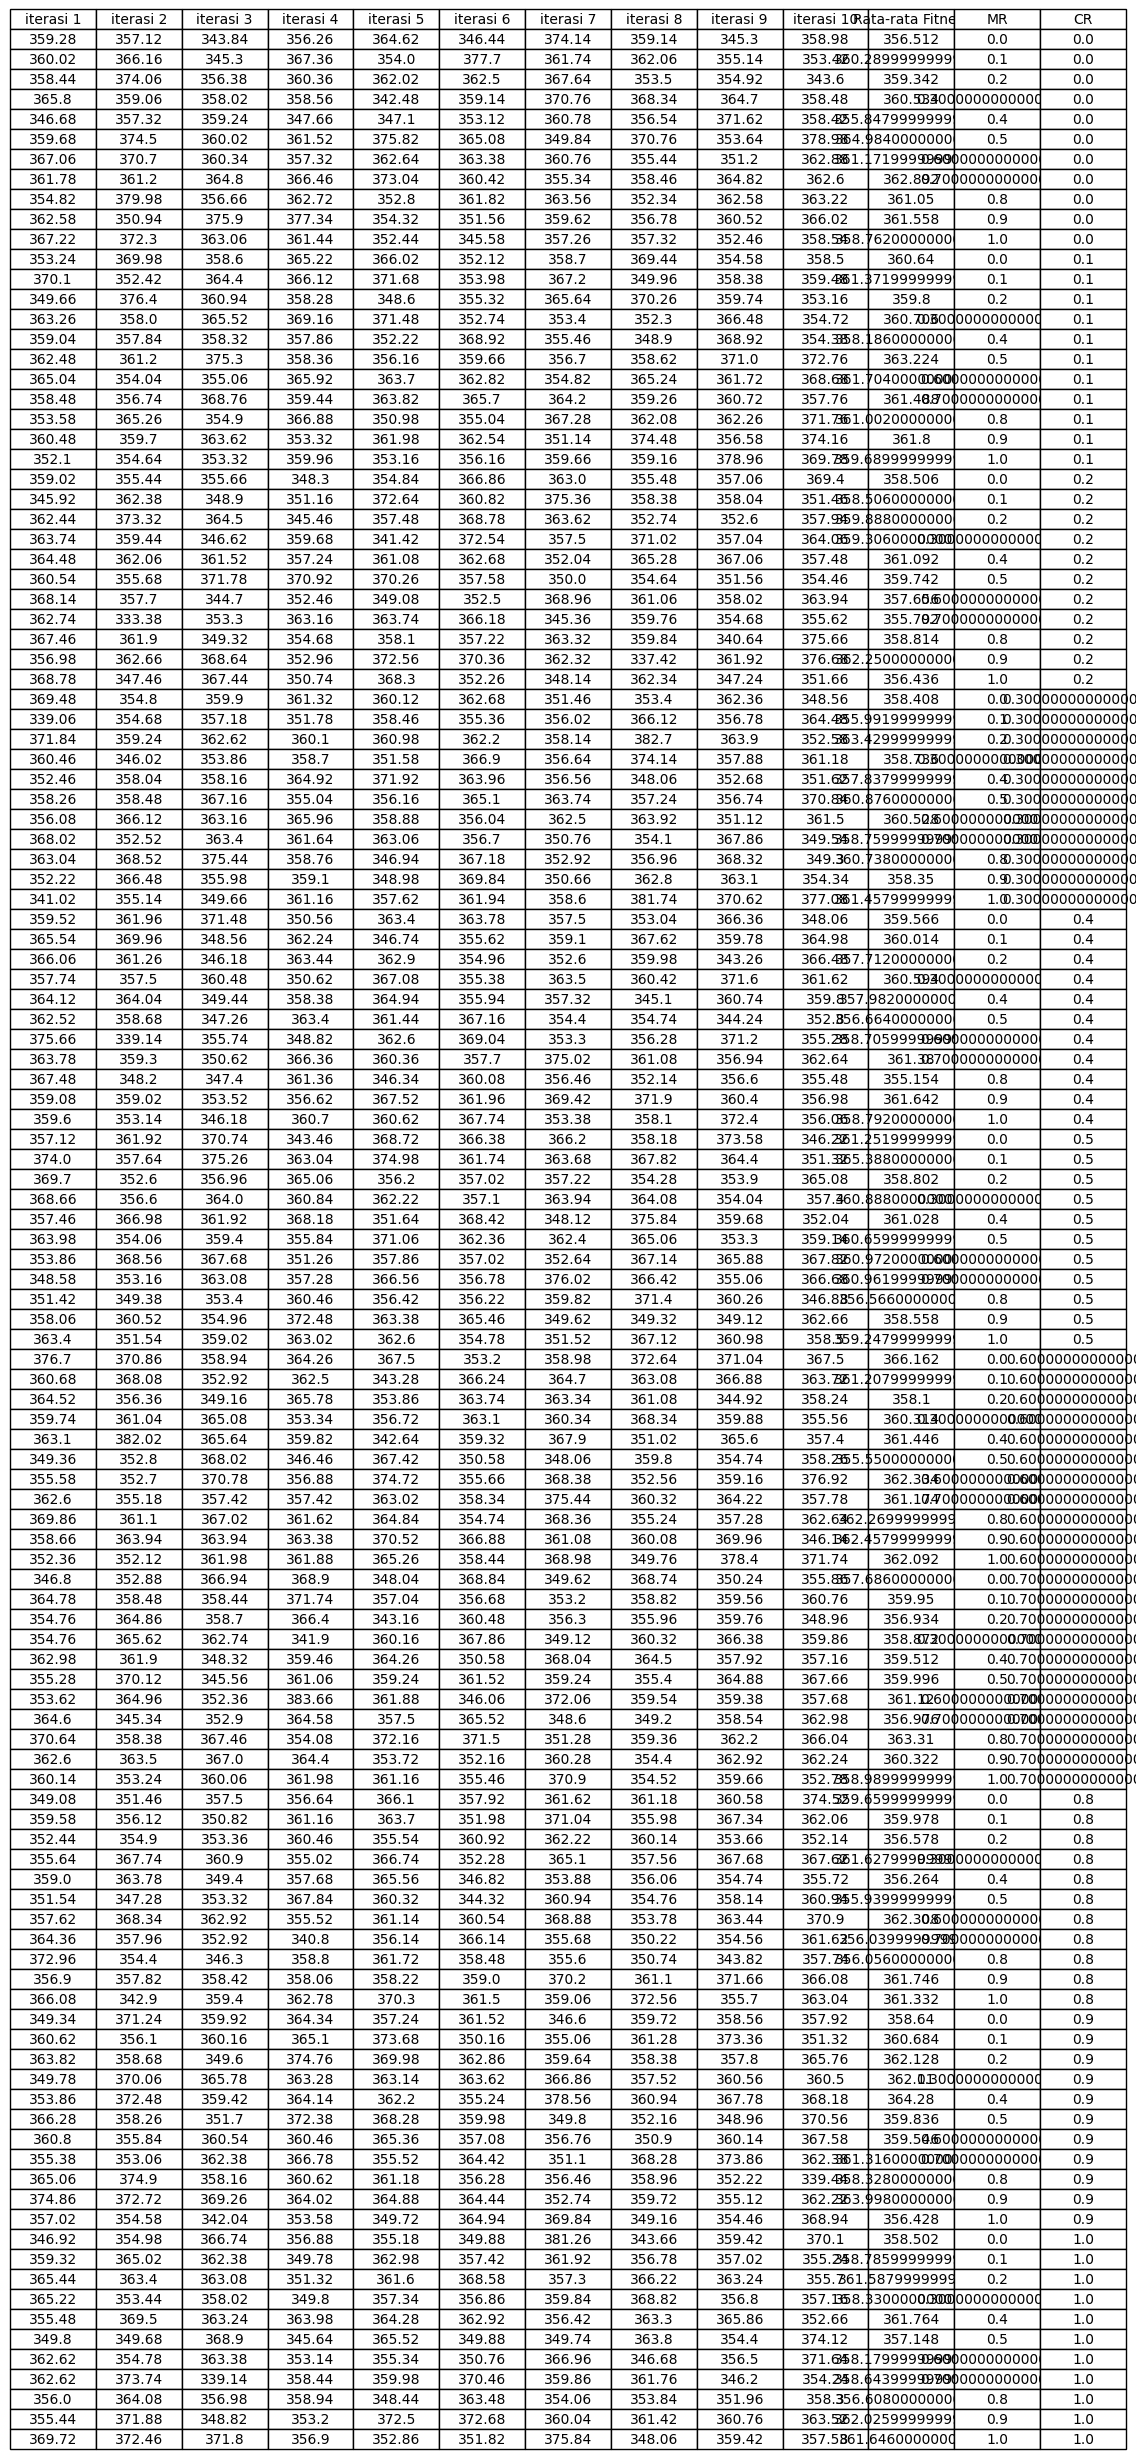

In [16]:
import pandas as pd
import random
import matplotlib.pyplot as plt

def populationClass(jumlahPopulasi, minimalOrder, maksimalOrder):
    populasi = []
    for _ in range(jumlahPopulasi):
        individu = [random.randint(minimalOrder, maksimalOrder) for _ in range(9)]
        populasi.append(individu)
    return populasi

def fitnessClass(populasi):
    fitness = []
    for individu in populasi:
        fit = sum(individu)
        fitness.append(fit)
    return fitness

def crossoverClass(populasi, Cr):
    childs = []
    for i in range(0, len(populasi), 2):
        if i + 1 < len(populasi):
            parent1 = populasi[i]
            parent2 = populasi[i + 1]
            child1 = parent1[:]
            child2 = parent2[:]
            if random.random() < Cr:
                crossover_point = random.randint(1, len(parent1) - 1)
                child1[crossover_point:], child2[crossover_point:] = parent2[crossover_point:], parent1[crossover_point:]
            childs.extend([child1, child2])
        else:
            childs.append(populasi[i])
    return childs

def mutationClass(populasi, MR, minimalOrder, maksimalOrder):
    mutated_populasi = []
    for individu in populasi:
        mutated = individu[:]
        if random.random() < MR:
            mutation_point = random.randint(0, len(individu) - 1)
            mutated[mutation_point] = random.randint(minimalOrder, maksimalOrder)
        mutated_populasi.append(mutated)
    return mutated_populasi

minimalOrder = 10
maksimalOrder = 70
jumlahPopulasi = 50
Cr_values = [0.1 * i for i in range(11)]
MR_values = [0.1 * i for i in range(11)]
iterasi = 10

hasil = []

for Cr in Cr_values:
    for MR in MR_values:
        fitness_iterasi = []
        for _ in range(iterasi):
            populasi = populationClass(jumlahPopulasi, minimalOrder, maksimalOrder)
            populasi = crossoverClass(populasi, Cr)
            populasi = mutationClass(populasi, MR, minimalOrder, maksimalOrder)
            fitness = fitnessClass(populasi)
            fitness_iterasi.append(sum(fitness) / len(fitness))
        rata2_fitness = sum(fitness_iterasi) / len(fitness_iterasi)
        hasil.append([*fitness_iterasi, rata2_fitness, MR, Cr])

columns = [f'iterasi {i + 1}' for i in range(iterasi)] + ['Rata-rata Fitness', 'MR', 'CR']
df_hasil = pd.DataFrame(hasil, columns=columns)

print(df_hasil)

plt.figure(figsize=(12, 8))

ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

table = plt.table(cellText=df_hasil.values, colLabels=df_hasil.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()